<a href="https://colab.research.google.com/github/mahi83995/CVPR/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
% matplotlib inline
from tensorflow import keras 
from keras.datasets import mnist  
from keras.layers import Input,Dense,Reshape,Flatten 
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU  
from keras.models import Sequential,Model  
from keras.optimizers import Adam
import random 



In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print("Shape of X_train: ",X_train.shape)
print("Label of Y_train: ",Y_train.shape)

#here we define two class. we test this class and load data.

11501568/11490434 [==============================] - 0s 0us/step
Shape of X_train:  (60000, 28, 28)
Label of Y_train:  (60000,)


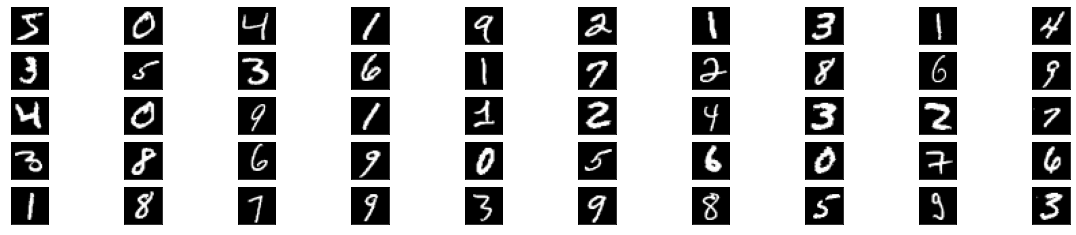

In [ ]:
plt.figure(figsize=(20,4))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i], cmap = 'gray')
    plt.xticks([])
    plt.yticks([])    
plt.show()

# here figure size 20,4 and range 50. In horizontal 10 images and vertical 5 images.
# gray scale image using in matplotlib.

In [ ]:

X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = np.expand_dims(X_train, axis=3)

# here we extend dimensions size using np
# Rescale -1 to 1

In [ ]:


noise_shape = (100)
img_shape = (28,28,1)

model = Sequential()
model.add(Dense(256, input_shape=noise_shape))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(512))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(784, activation='tanh'))
model.add(Reshape(img_shape))

model.summary()

noise = Input(shape=noise_shape)
img = model(noise)

generator =  Model(inputs = noise, outputs = img)

optimizer = Adam(0.0002, 0.5)
generator.compile(loss='binary_crossentropy', optimizer=optimizer)

#here we define noise shape 100 and image shape 28,28,1. By using sequential we one tensor input and output.
#Leaky ReLu gives an extremely small linear component of x to negative inputs
#For deep nural network we use BatchNormalization with momentum 0.8
#Last we reshape image

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               25856     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              5

In [ ]:


model = Sequential()

model.add(Flatten(input_shape=img_shape))
model.add(Dense(512))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

img = Input(shape=img_shape)
validity = model(img)

discriminator =  Model(inputs = img, outputs = validity)
discriminator.compile(loss='binary_crossentropy', 
            optimizer=optimizer,
            metrics=['accuracy'])
# here we use flatten to get a copy of an given array collapsed into one dimension
#Leaky ReLu gives an extremely small linear component of x to negative inputs 0.2
#For mathematical function we use sigmoid
#then it will receive a sample from the real data and will provide the probability that the sample belongs to the real training data.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
________________________________________________

In [ ]:

z = Input(shape=(100,))
img = generator(z)

discriminator.trainable = False

#valid takes generated images as input
valid = discriminator(img)

combined = Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)
combined.summary()
#combining generator and discriminator
#Generator improves with training, the discriminator performance gets worse because the discriminator can't easily tell the difference between real and fake

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
model (Functional)           (None, 28, 28, 1)         1493520   
_________________________________________________________________
model_1 (Functional)         (None, 1)                 533505    
Total params: 2,027,025
Trainable params: 1,489,936
Non-trainable params: 537,089
_________________________________________________________________


In [ ]:
def print_imgs():
    r, c = 2, 10
    noise = np.random.normal(0, 1, (r * c, 100))
    gen_imgs = generator.predict(noise)

    
    gen_imgs = 0.5 * gen_imgs + 0.5
    fig, axs = plt.subplots(r, c, figsize=(20, 4))
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap = 'gray')
            axs[i,j].axis('off')
            cnt += 1
    plt.show()
    plt.close()

Epoch: 0, Discrimination Loss: 0.535980, Discrimination Accuracy.: 83.59% Generator Loss: 0.494771


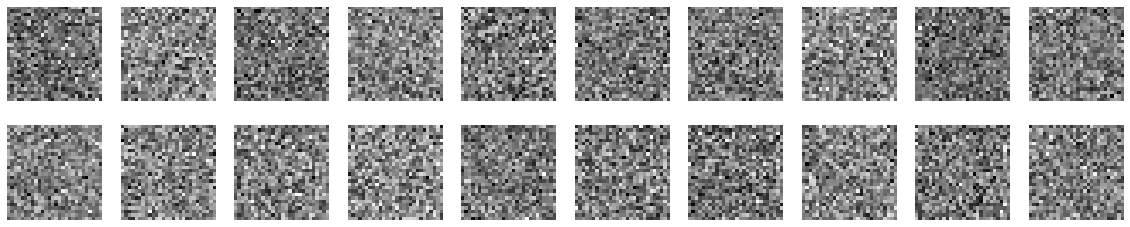

Epoch: 1000, Discrimination Loss: 0.591947, Discrimination Accuracy.: 75.00% Generator Loss: 0.911019


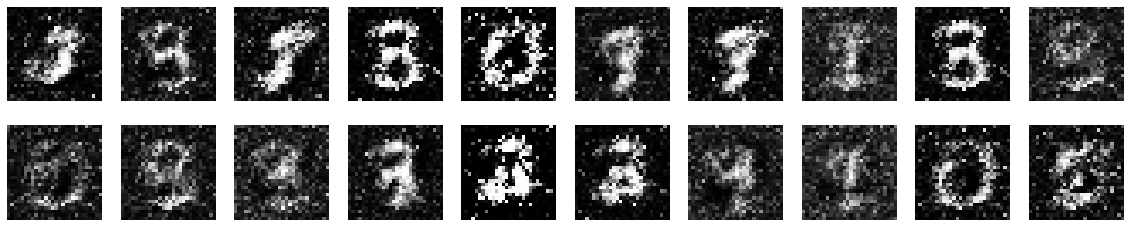

Epoch: 2000, Discrimination Loss: 0.541127, Discrimination Accuracy.: 76.56% Generator Loss: 1.113007


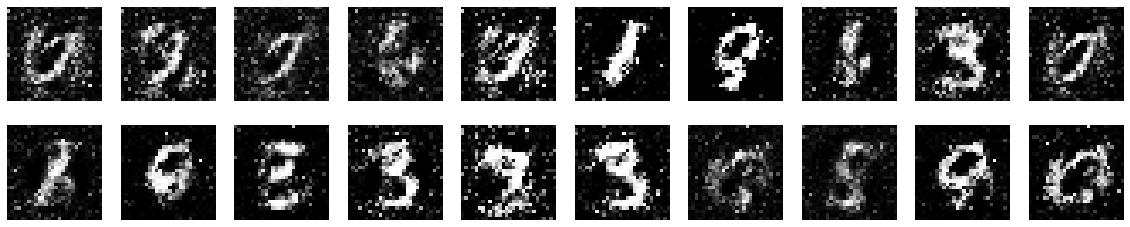

Epoch: 3000, Discrimination Loss: 0.615104, Discrimination Accuracy.: 65.62% Generator Loss: 1.061957


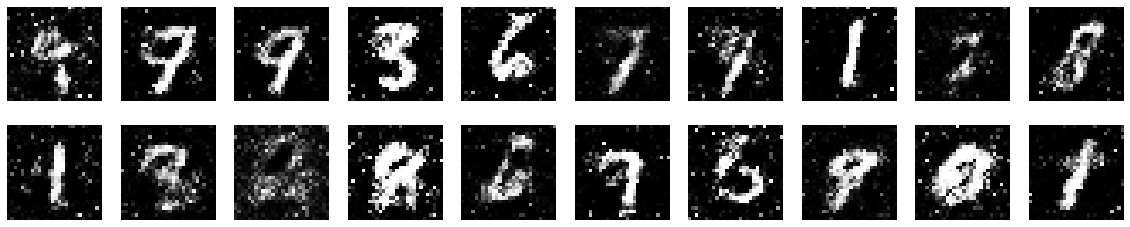

Epoch: 4000, Discrimination Loss: 0.627774, Discrimination Accuracy.: 68.75% Generator Loss: 0.898027


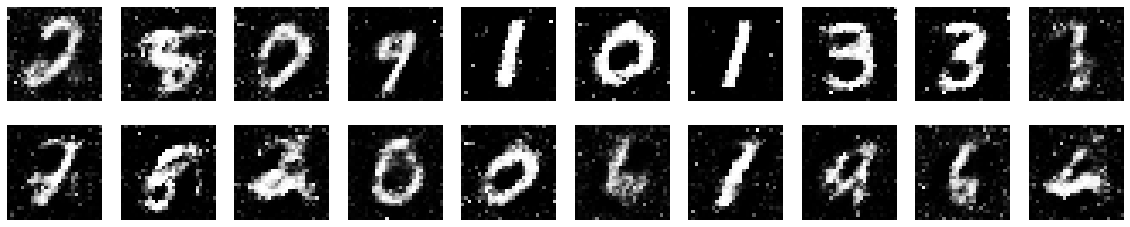

Epoch: 5000, Discrimination Loss: 0.626939, Discrimination Accuracy.: 63.28% Generator Loss: 0.921191


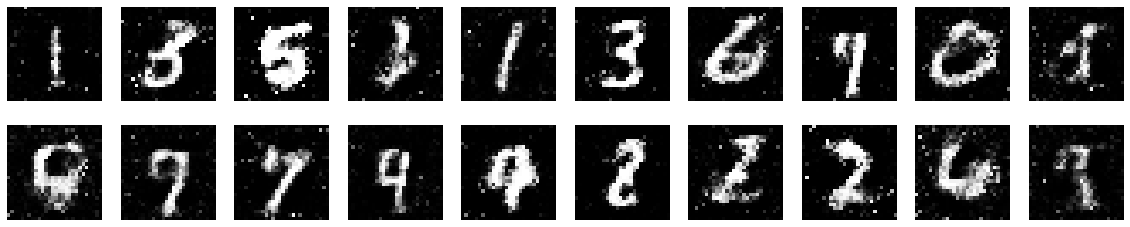

Epoch: 6000, Discrimination Loss: 0.728664, Discrimination Accuracy.: 50.78% Generator Loss: 0.857220


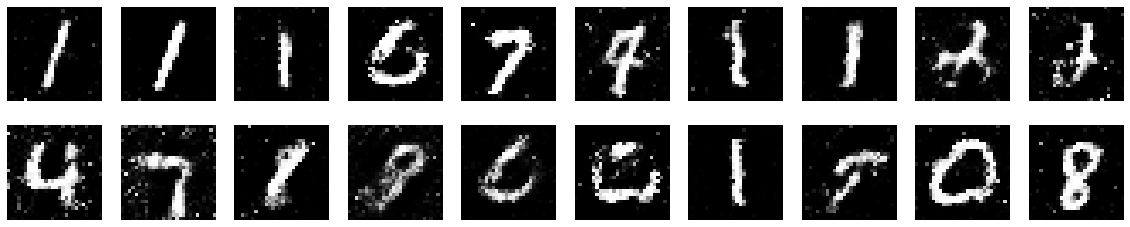

Epoch: 7000, Discrimination Loss: 0.631081, Discrimination Accuracy.: 63.28% Generator Loss: 0.930485


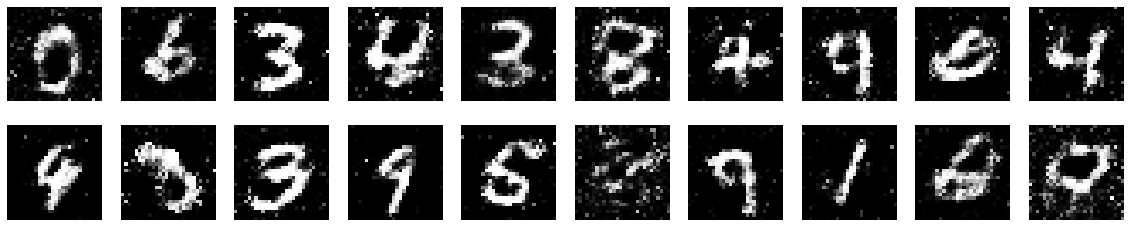

Epoch: 8000, Discrimination Loss: 0.682651, Discrimination Accuracy.: 54.69% Generator Loss: 0.852733


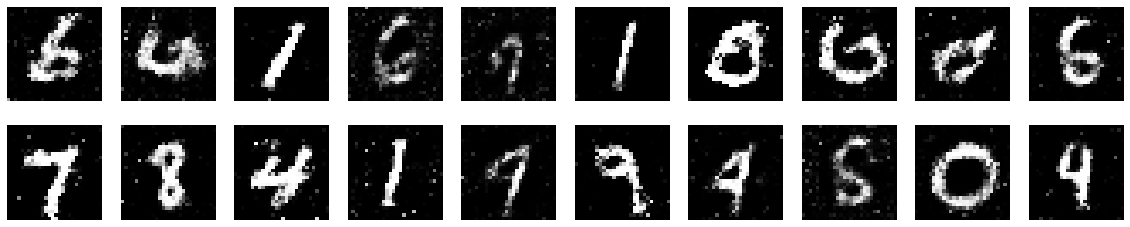

Epoch: 9000, Discrimination Loss: 0.694521, Discrimination Accuracy.: 54.69% Generator Loss: 0.819517


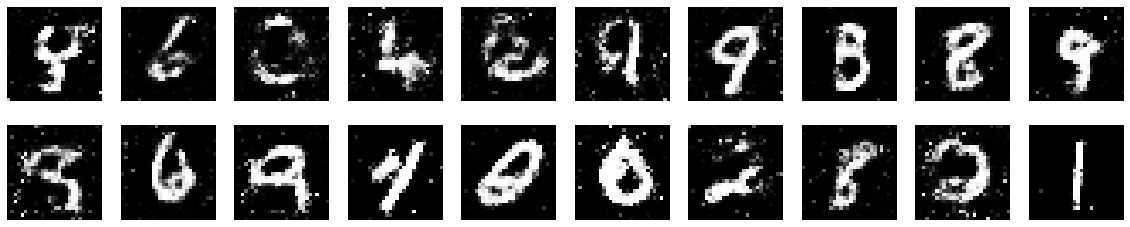

Epoch: 10000, Discrimination Loss: 0.691159, Discrimination Accuracy.: 51.56% Generator Loss: 0.870245


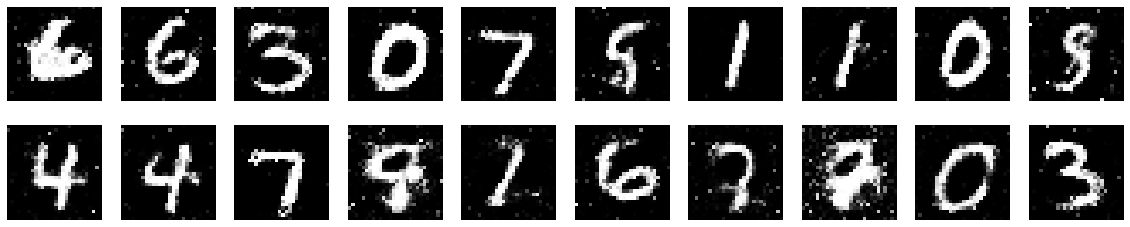

Epoch: 11000, Discrimination Loss: 0.709903, Discrimination Accuracy.: 53.12% Generator Loss: 0.867939


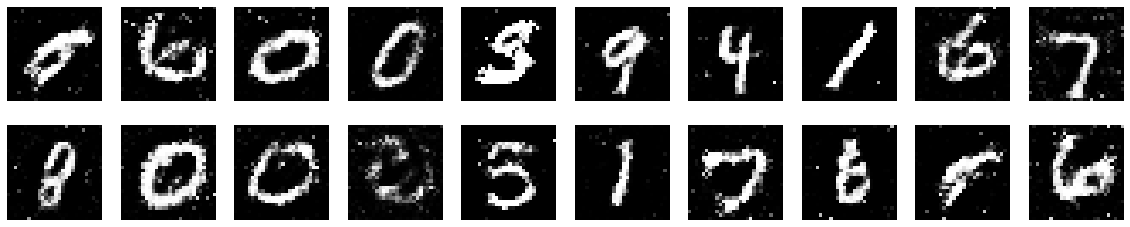

Epoch: 12000, Discrimination Loss: 0.637508, Discrimination Accuracy.: 63.28% Generator Loss: 0.852814


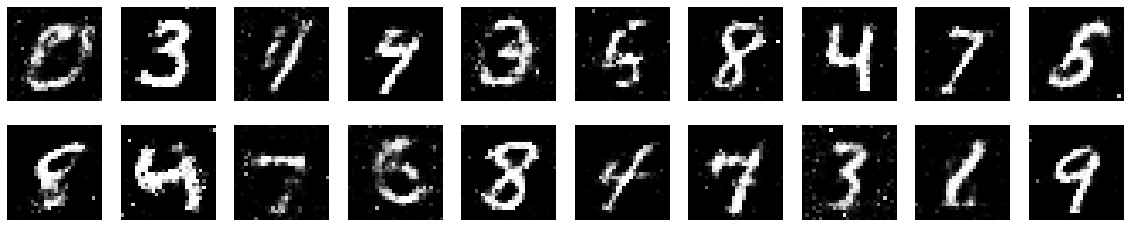

Epoch: 13000, Discrimination Loss: 0.695528, Discrimination Accuracy.: 57.03% Generator Loss: 0.868038


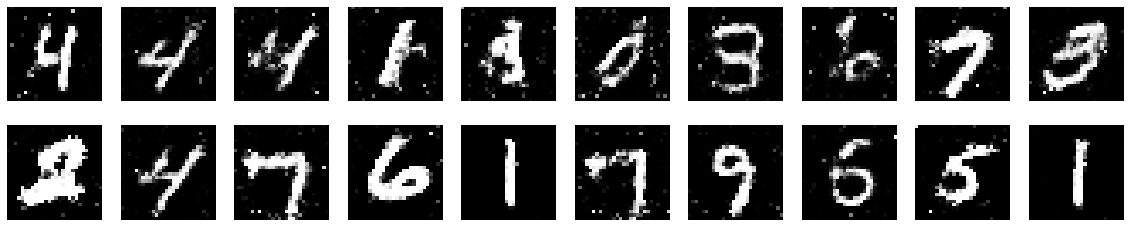

Epoch: 14000, Discrimination Loss: 0.681944, Discrimination Accuracy.: 50.00% Generator Loss: 0.852252


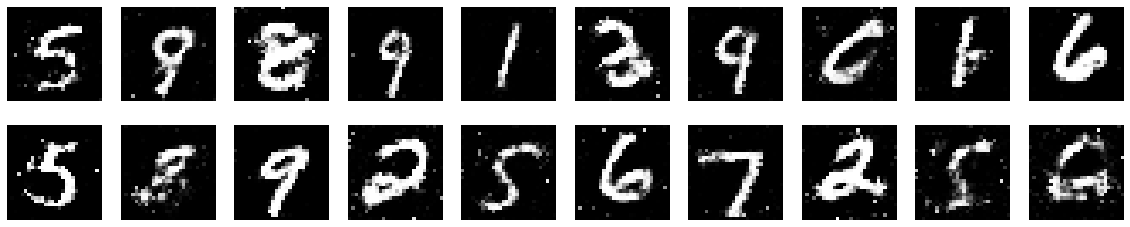

Epoch: 15000, Discrimination Loss: 0.675107, Discrimination Accuracy.: 58.59% Generator Loss: 0.888639


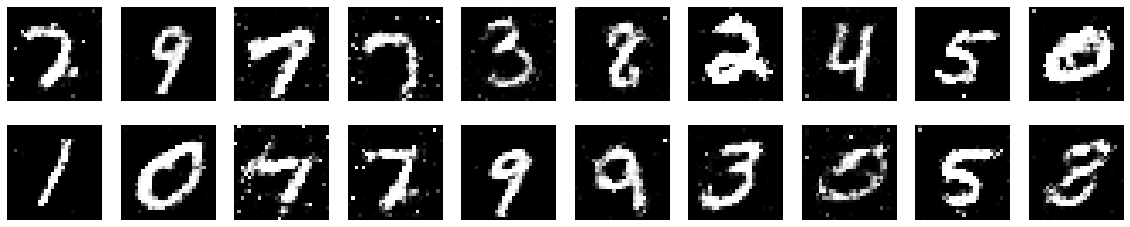

Epoch: 16000, Discrimination Loss: 0.720221, Discrimination Accuracy.: 53.12% Generator Loss: 0.870323


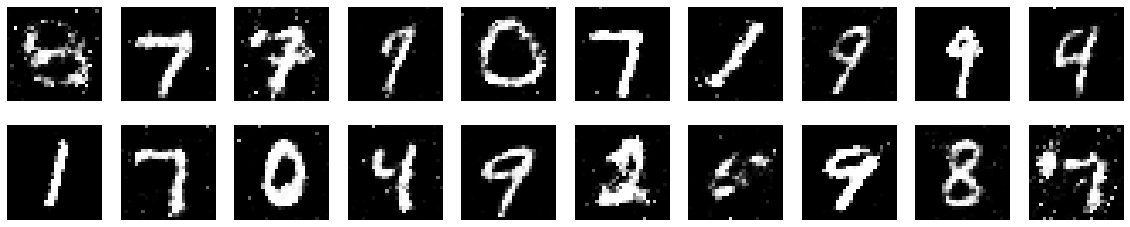

Epoch: 17000, Discrimination Loss: 0.657136, Discrimination Accuracy.: 61.72% Generator Loss: 0.858461


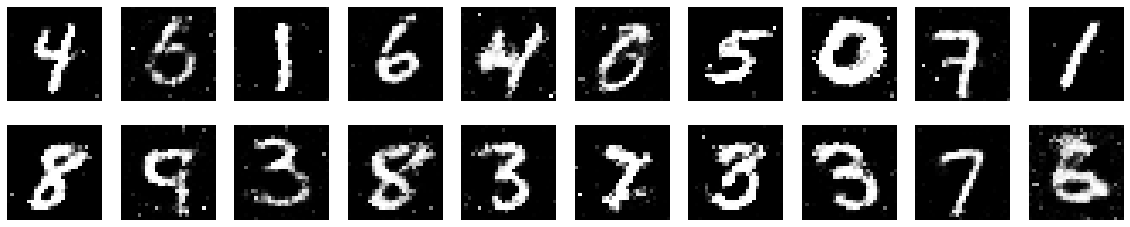

Epoch: 18000, Discrimination Loss: 0.662898, Discrimination Accuracy.: 57.03% Generator Loss: 0.879682


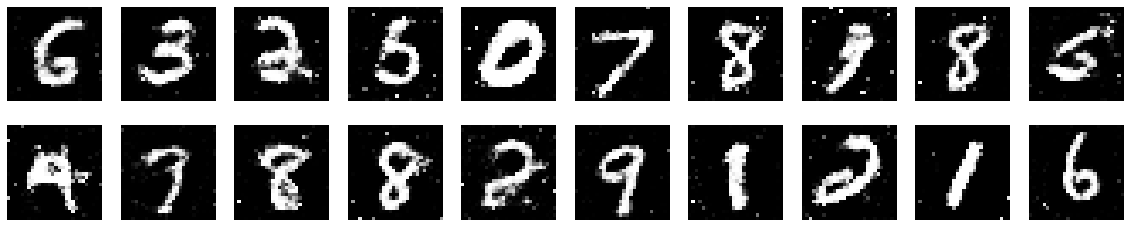

Epoch: 19000, Discrimination Loss: 0.683062, Discrimination Accuracy.: 56.25% Generator Loss: 0.845315


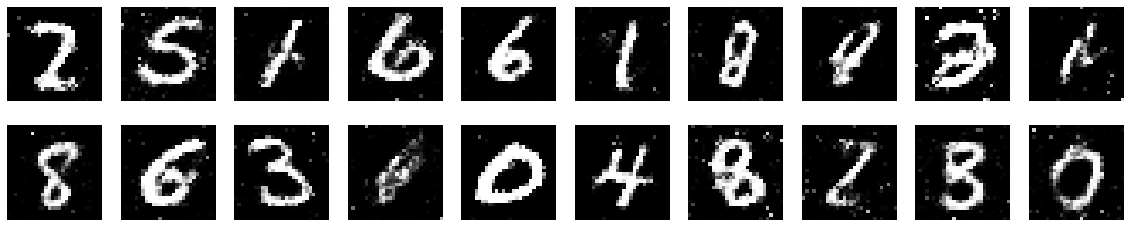

Epoch: 20000, Discrimination Loss: 0.645596, Discrimination Accuracy.: 61.72% Generator Loss: 0.828312


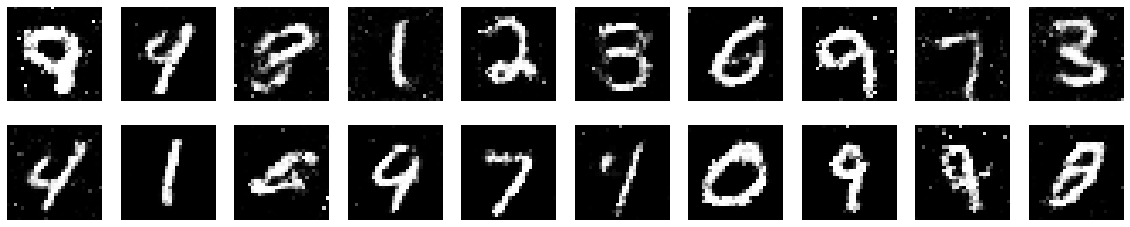

Epoch: 21000, Discrimination Loss: 0.643408, Discrimination Accuracy.: 63.28% Generator Loss: 0.877051


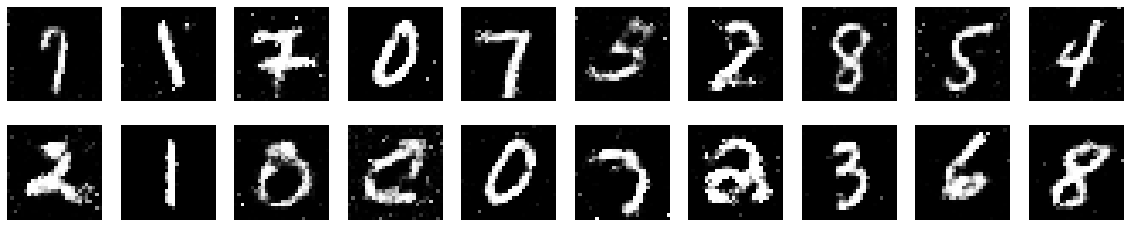

Epoch: 22000, Discrimination Loss: 0.681418, Discrimination Accuracy.: 57.81% Generator Loss: 0.828877


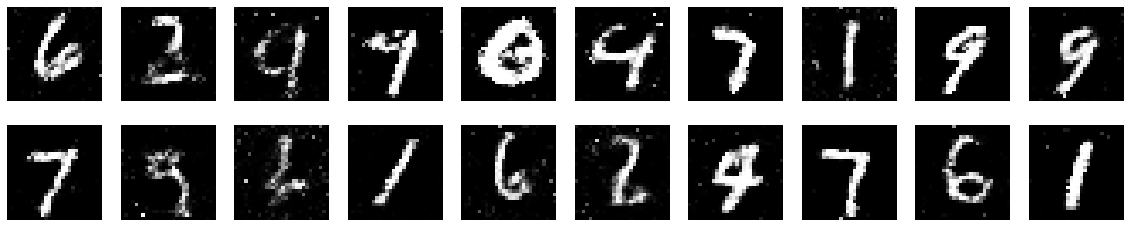

Epoch: 23000, Discrimination Loss: 0.660614, Discrimination Accuracy.: 63.28% Generator Loss: 0.865048


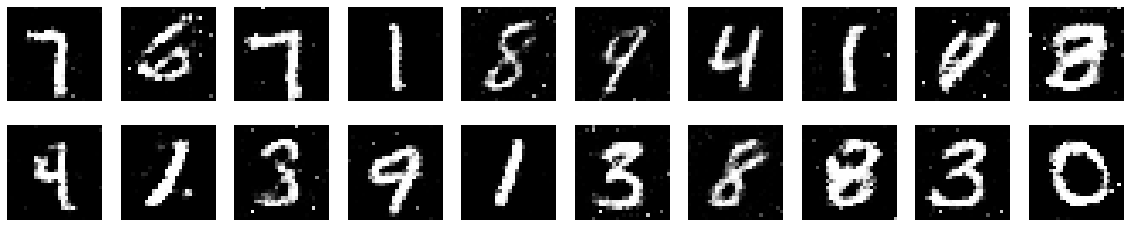

Epoch: 24000, Discrimination Loss: 0.640020, Discrimination Accuracy.: 59.38% Generator Loss: 0.854131


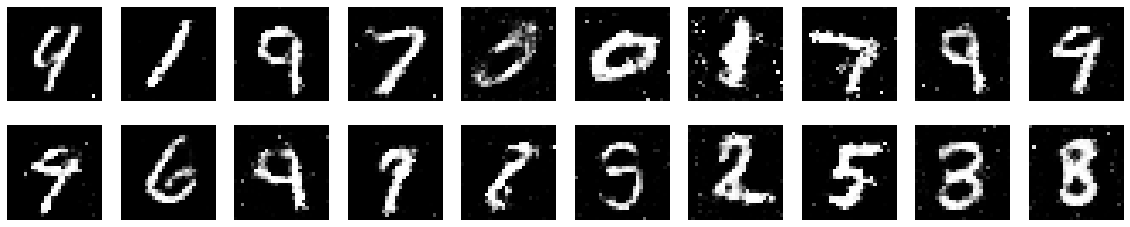

Epoch: 25000, Discrimination Loss: 0.649422, Discrimination Accuracy.: 60.16% Generator Loss: 0.875651


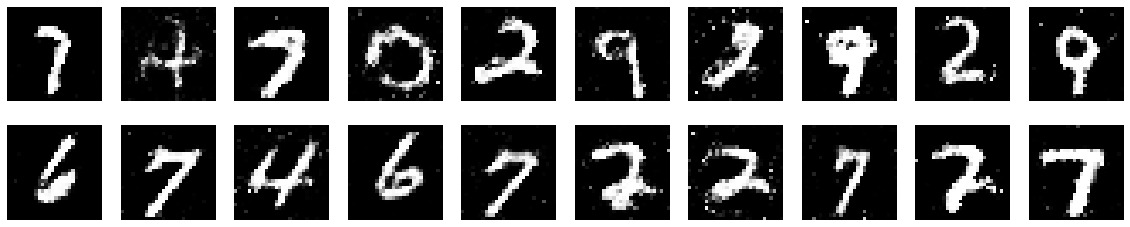

Epoch: 26000, Discrimination Loss: 0.700322, Discrimination Accuracy.: 47.66% Generator Loss: 0.861811


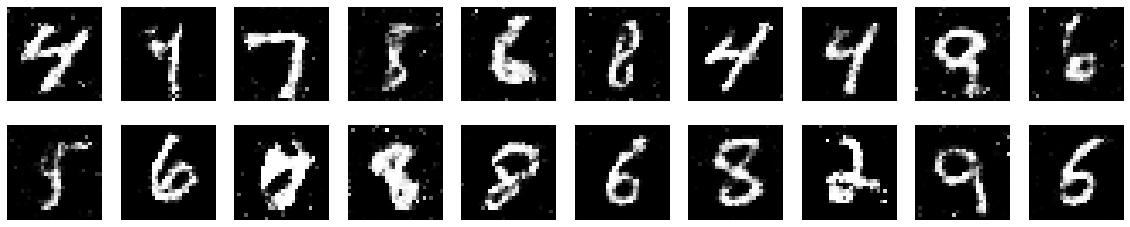

Epoch: 27000, Discrimination Loss: 0.681962, Discrimination Accuracy.: 59.38% Generator Loss: 0.842508


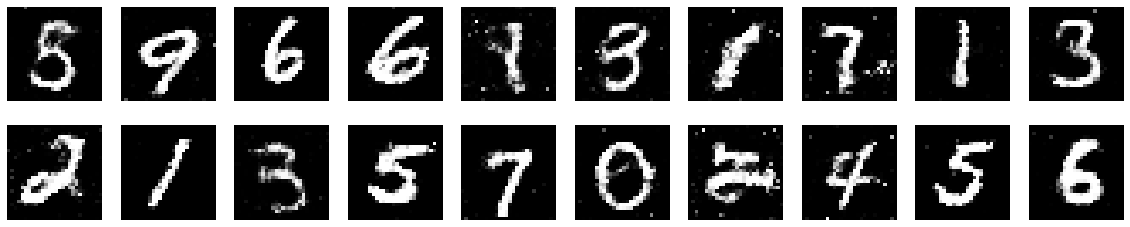

Epoch: 28000, Discrimination Loss: 0.644833, Discrimination Accuracy.: 61.72% Generator Loss: 0.879002


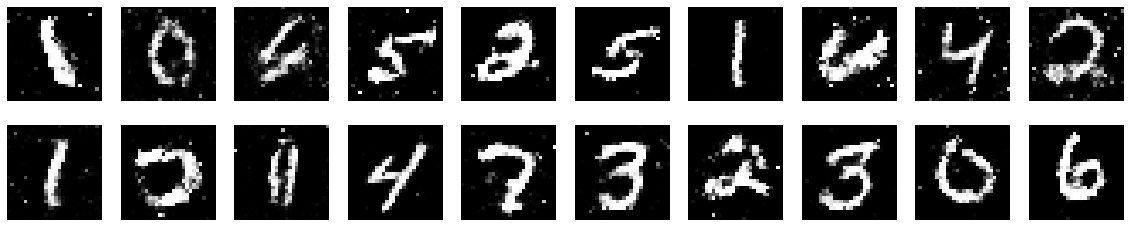

Epoch: 29000, Discrimination Loss: 0.669045, Discrimination Accuracy.: 59.38% Generator Loss: 0.869173


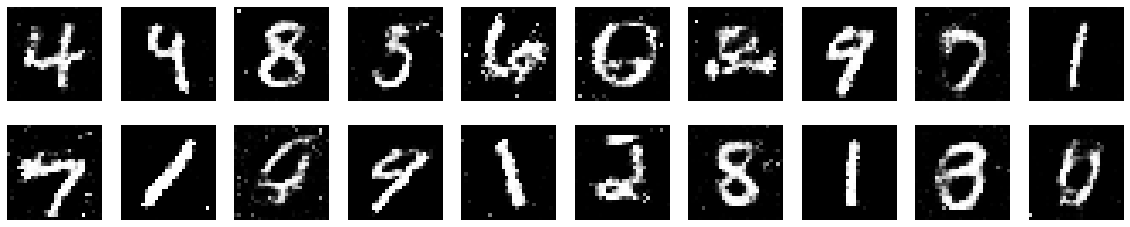

Epoch: 30000, Discrimination Loss: 0.663949, Discrimination Accuracy.: 61.72% Generator Loss: 0.854697


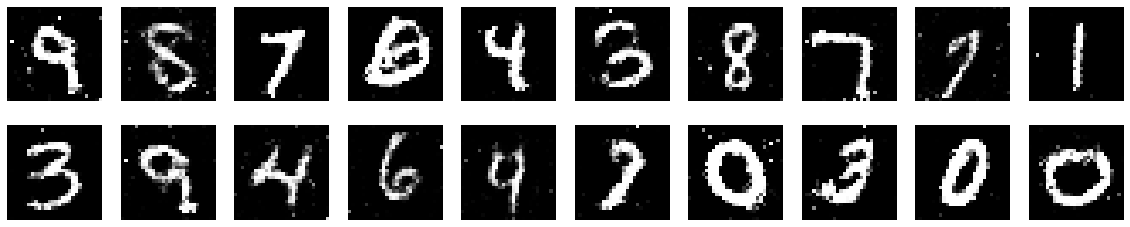

Epoch: 31000, Discrimination Loss: 0.665107, Discrimination Accuracy.: 63.28% Generator Loss: 0.913671


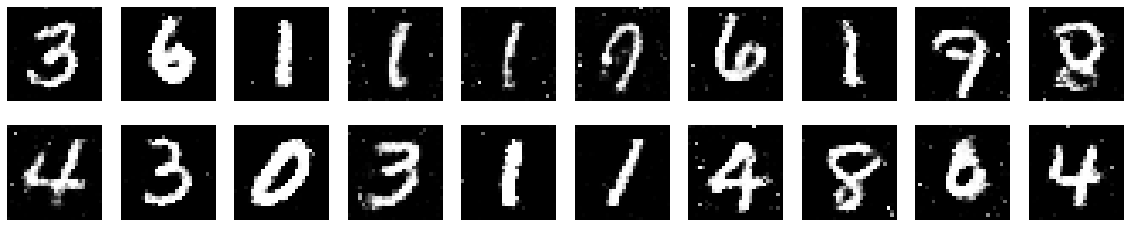

Epoch: 32000, Discrimination Loss: 0.615288, Discrimination Accuracy.: 69.53% Generator Loss: 0.905992


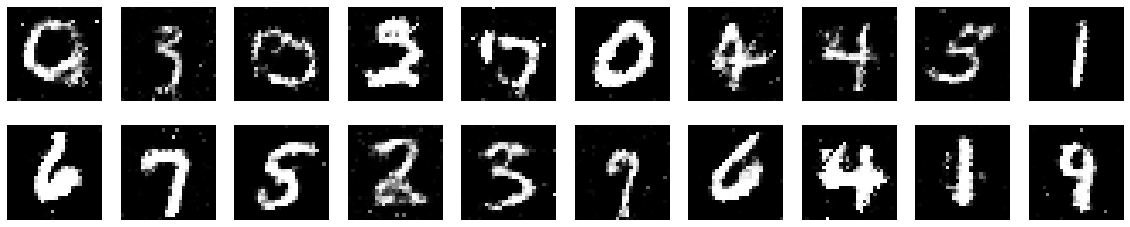

Epoch: 33000, Discrimination Loss: 0.676770, Discrimination Accuracy.: 49.22% Generator Loss: 0.905160


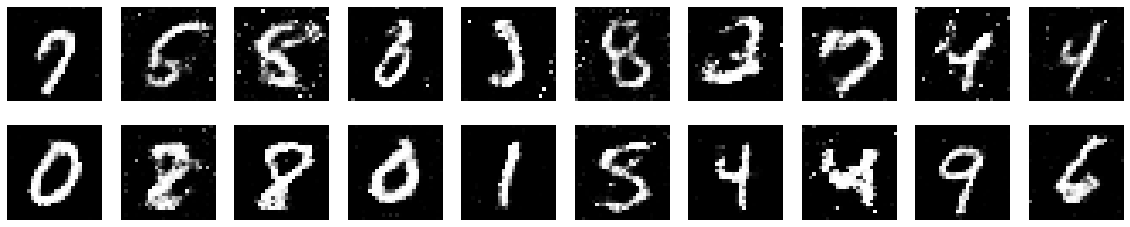

Epoch: 34000, Discrimination Loss: 0.709018, Discrimination Accuracy.: 56.25% Generator Loss: 0.877043


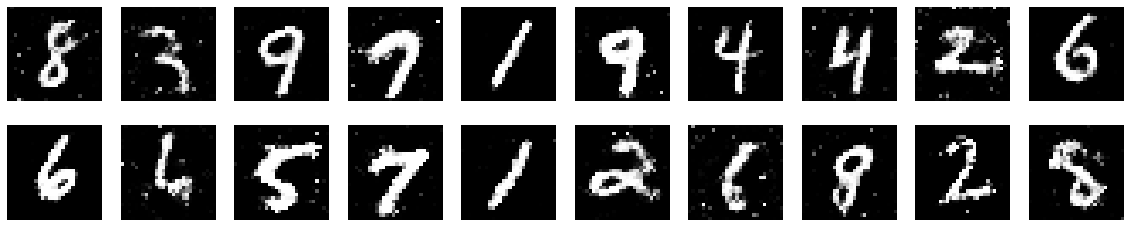

Epoch: 35000, Discrimination Loss: 0.649803, Discrimination Accuracy.: 61.72% Generator Loss: 0.883368


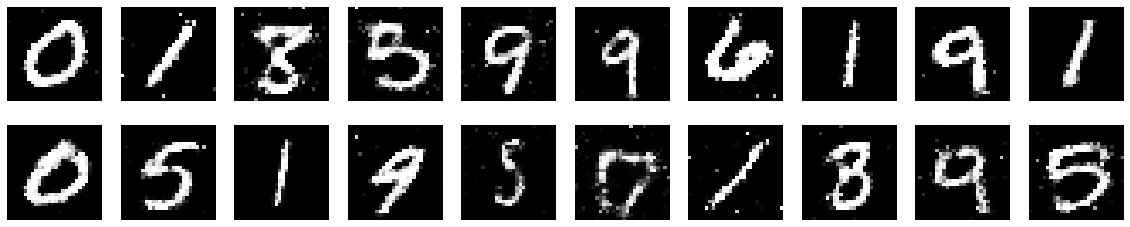

Epoch: 36000, Discrimination Loss: 0.624497, Discrimination Accuracy.: 67.97% Generator Loss: 0.903169


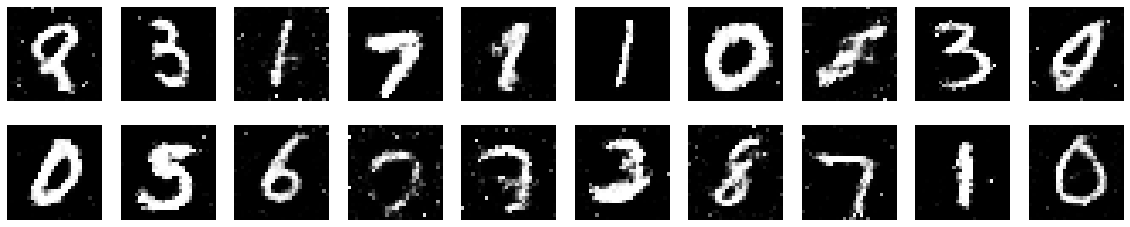

Epoch: 37000, Discrimination Loss: 0.648094, Discrimination Accuracy.: 62.50% Generator Loss: 0.887896


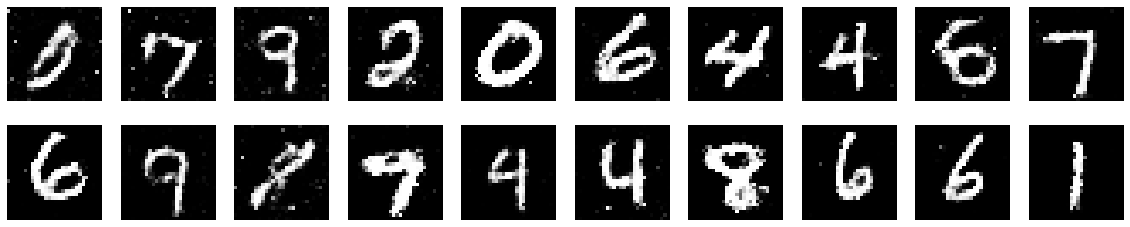

Epoch: 38000, Discrimination Loss: 0.709942, Discrimination Accuracy.: 50.78% Generator Loss: 0.877952


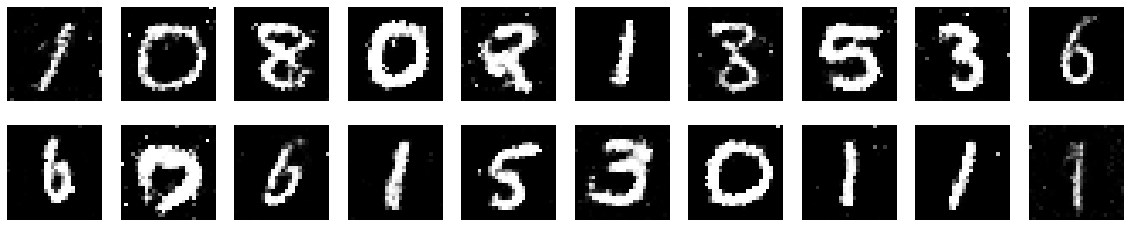

Epoch: 39000, Discrimination Loss: 0.691783, Discrimination Accuracy.: 50.78% Generator Loss: 0.873419


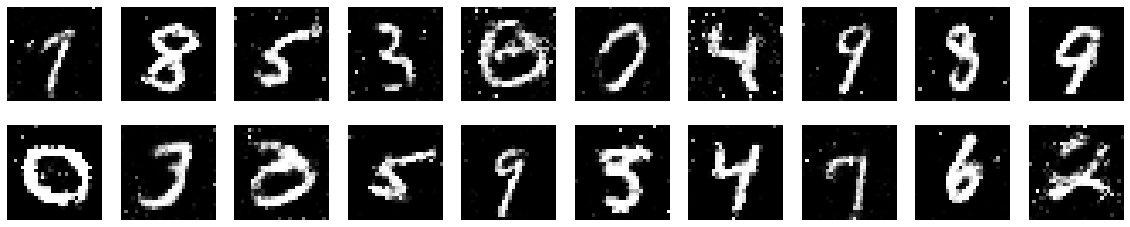

Epoch: 40000, Discrimination Loss: 0.671217, Discrimination Accuracy.: 59.38% Generator Loss: 0.858579


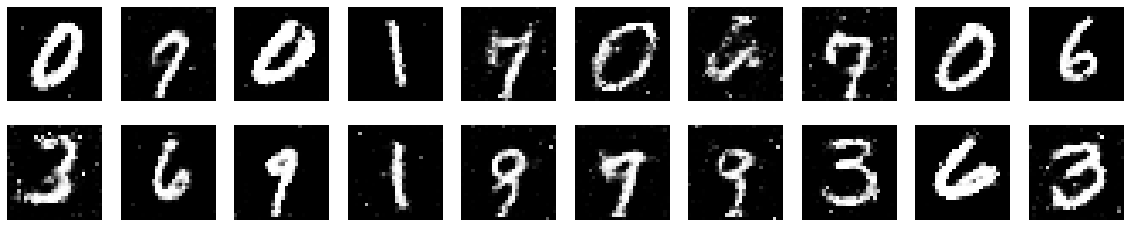

Epoch: 41000, Discrimination Loss: 0.657890, Discrimination Accuracy.: 62.50% Generator Loss: 0.887398


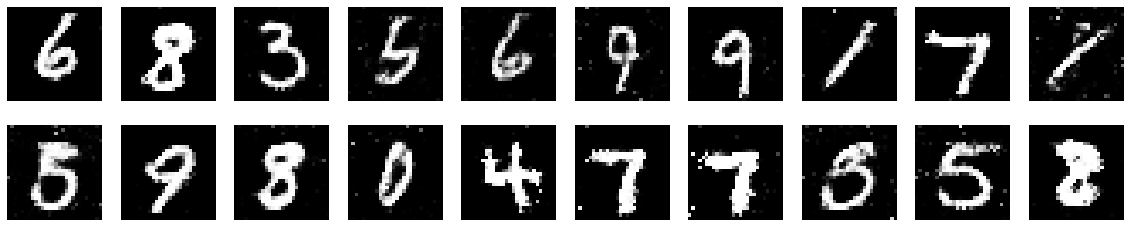

Epoch: 42000, Discrimination Loss: 0.661168, Discrimination Accuracy.: 57.81% Generator Loss: 0.884862


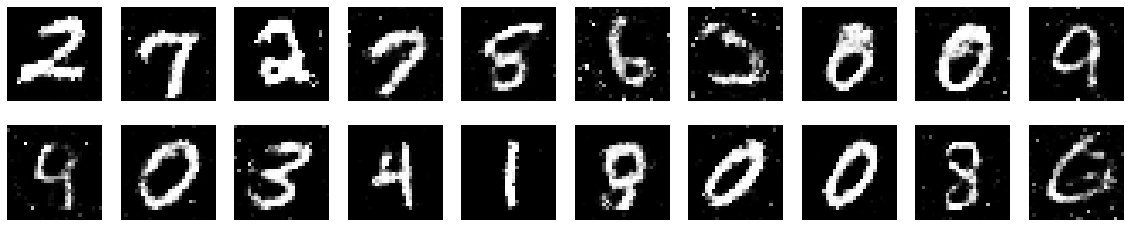

Epoch: 43000, Discrimination Loss: 0.654873, Discrimination Accuracy.: 60.16% Generator Loss: 0.839966


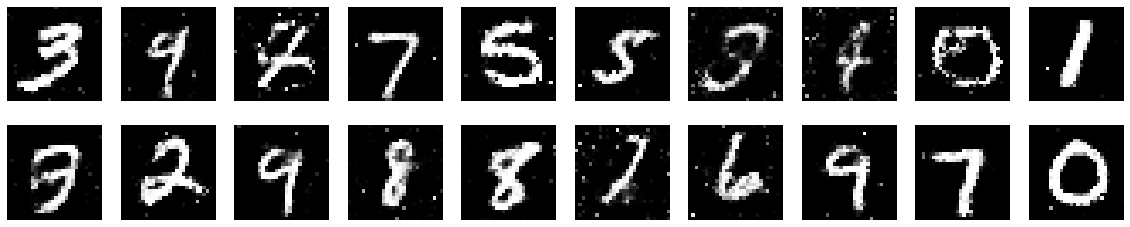

Epoch: 44000, Discrimination Loss: 0.649205, Discrimination Accuracy.: 61.72% Generator Loss: 0.921296


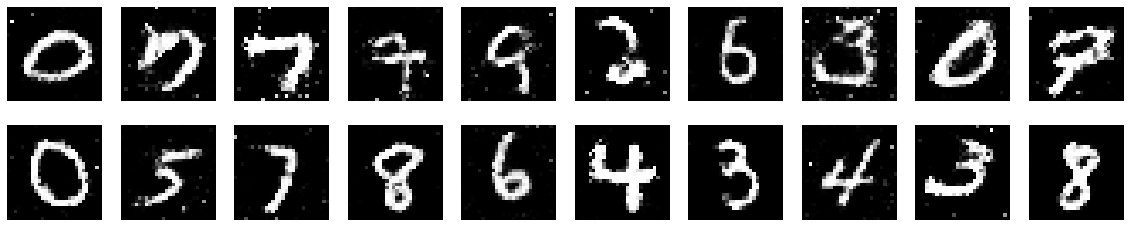

Epoch: 45000, Discrimination Loss: 0.661616, Discrimination Accuracy.: 63.28% Generator Loss: 0.796708


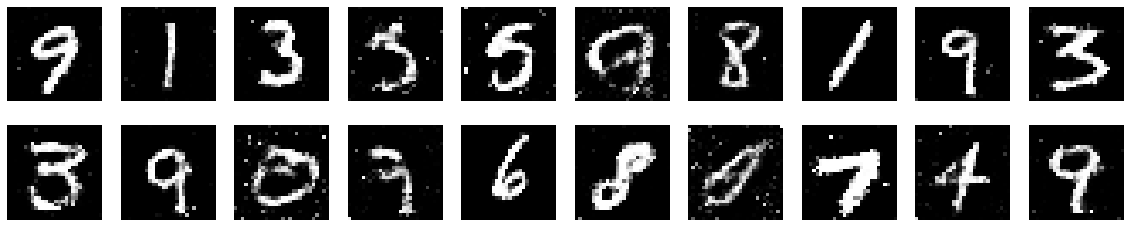

Epoch: 46000, Discrimination Loss: 0.660565, Discrimination Accuracy.: 59.38% Generator Loss: 0.904703


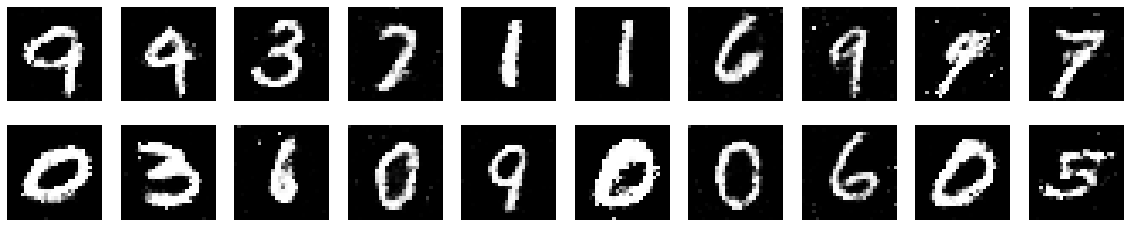

Epoch: 47000, Discrimination Loss: 0.650444, Discrimination Accuracy.: 57.03% Generator Loss: 0.879282


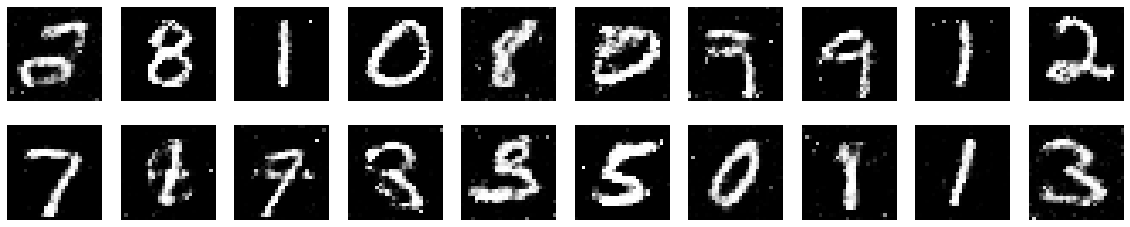

Epoch: 48000, Discrimination Loss: 0.656363, Discrimination Accuracy.: 62.50% Generator Loss: 0.885044


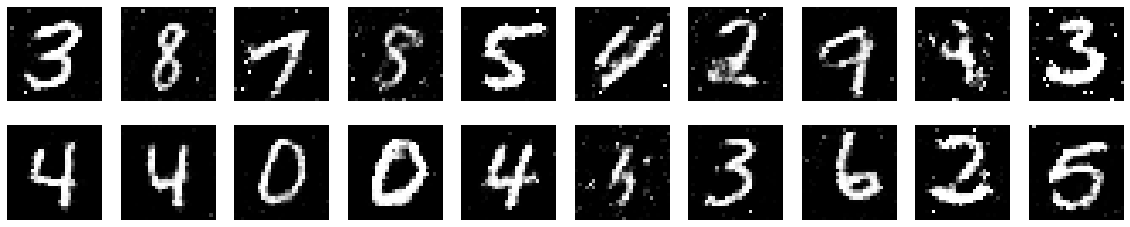

Epoch: 49000, Discrimination Loss: 0.683609, Discrimination Accuracy.: 56.25% Generator Loss: 0.884862


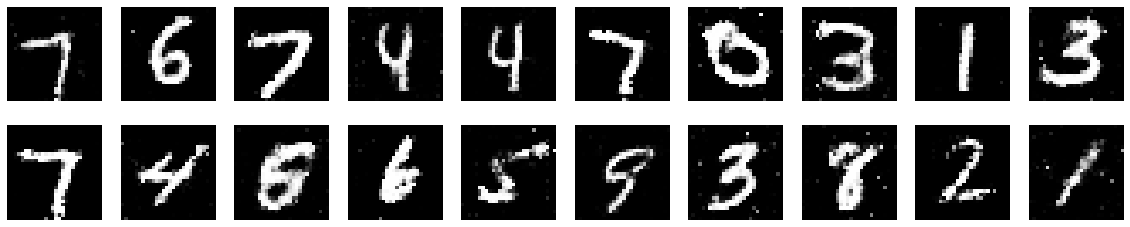

Epoch: 50000, Discrimination Loss: 0.654615, Discrimination Accuracy.: 62.50% Generator Loss: 0.875018


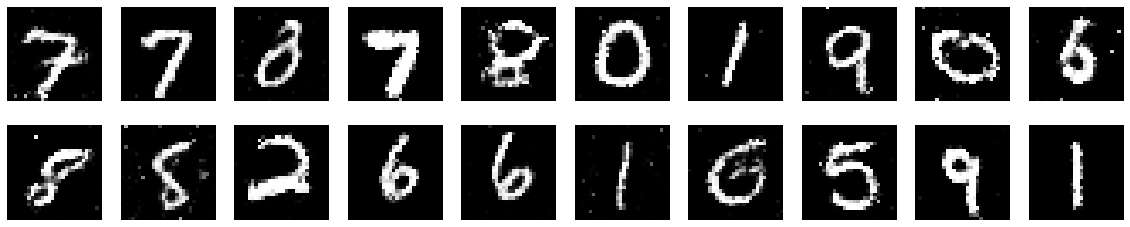

Epoch: 51000, Discrimination Loss: 0.702401, Discrimination Accuracy.: 56.25% Generator Loss: 0.905764


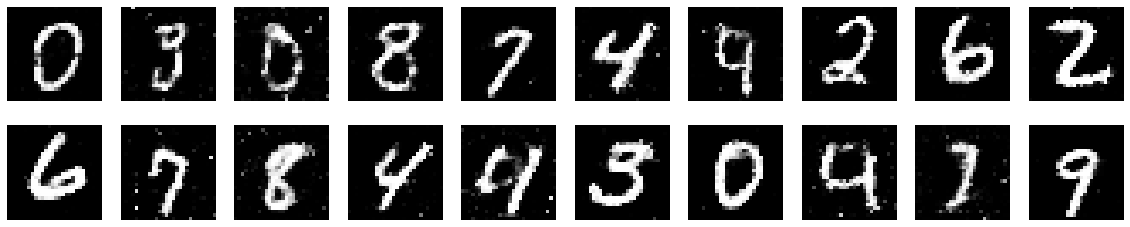

Epoch: 52000, Discrimination Loss: 0.696149, Discrimination Accuracy.: 50.00% Generator Loss: 0.904940


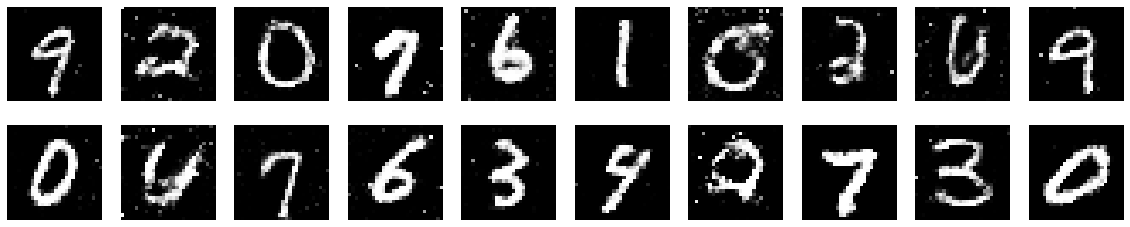

Epoch: 53000, Discrimination Loss: 0.637807, Discrimination Accuracy.: 63.28% Generator Loss: 0.921573


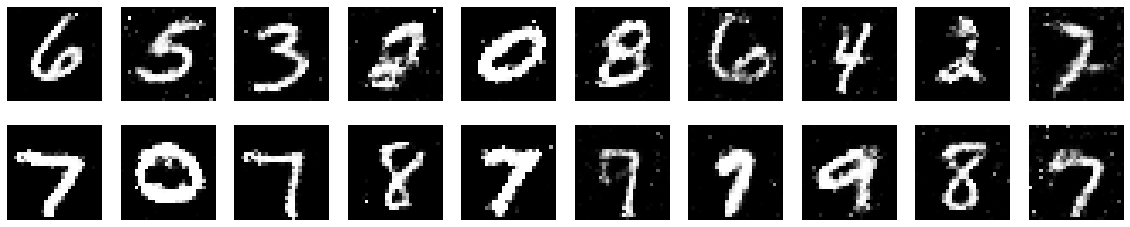

Epoch: 54000, Discrimination Loss: 0.655418, Discrimination Accuracy.: 58.59% Generator Loss: 0.849306


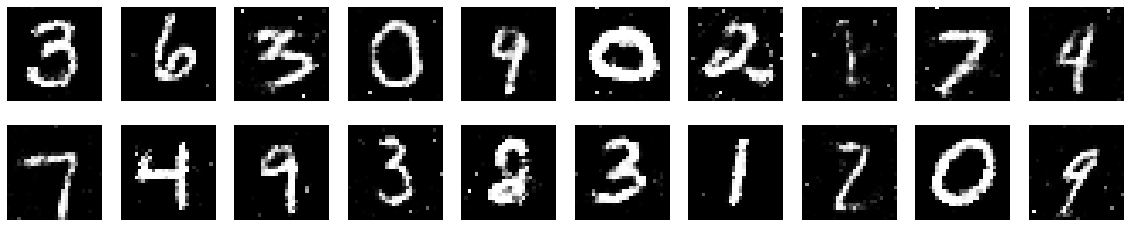

Epoch: 55000, Discrimination Loss: 0.634542, Discrimination Accuracy.: 57.81% Generator Loss: 0.893976


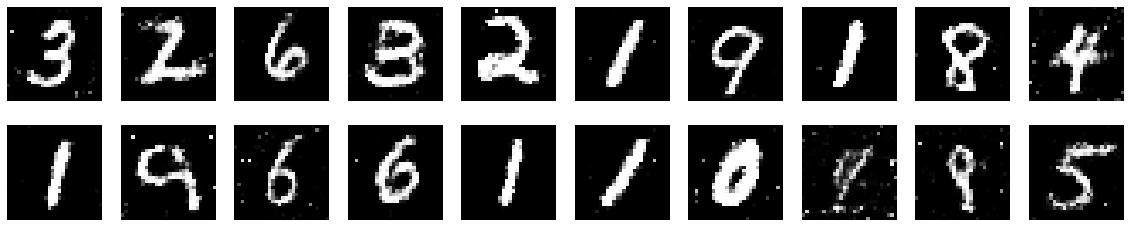

Epoch: 56000, Discrimination Loss: 0.633489, Discrimination Accuracy.: 60.16% Generator Loss: 0.867660


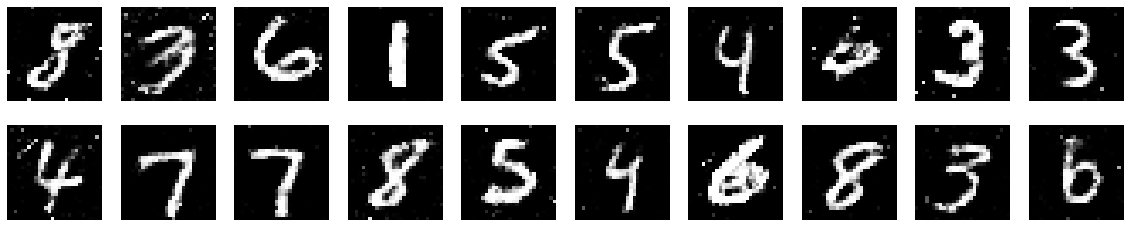

Epoch: 57000, Discrimination Loss: 0.657840, Discrimination Accuracy.: 58.59% Generator Loss: 0.897565


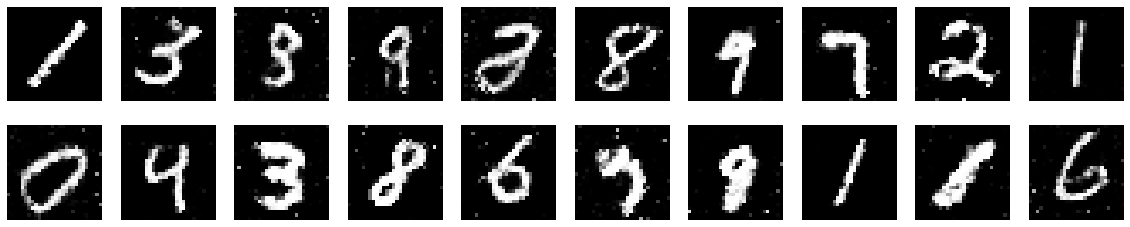

Epoch: 58000, Discrimination Loss: 0.583213, Discrimination Accuracy.: 69.53% Generator Loss: 0.858205


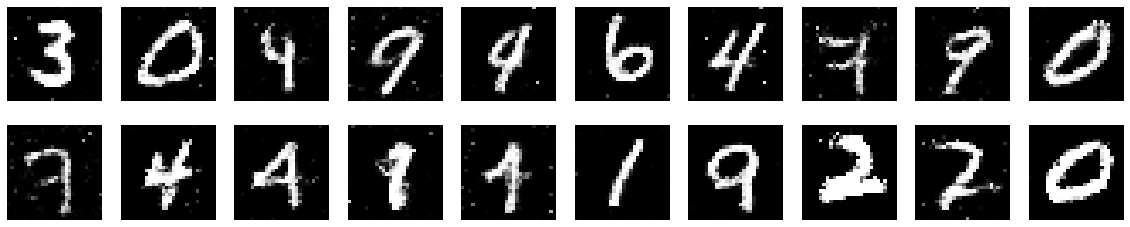

Epoch: 59000, Discrimination Loss: 0.681183, Discrimination Accuracy.: 57.81% Generator Loss: 0.906844


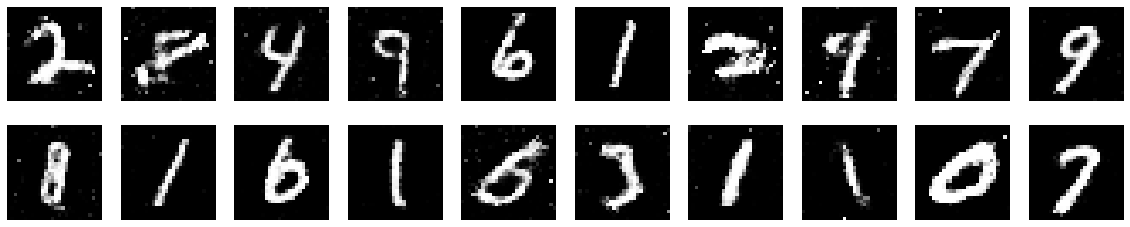

Epoch: 60000, Discrimination Loss: 0.616930, Discrimination Accuracy.: 61.72% Generator Loss: 0.928704


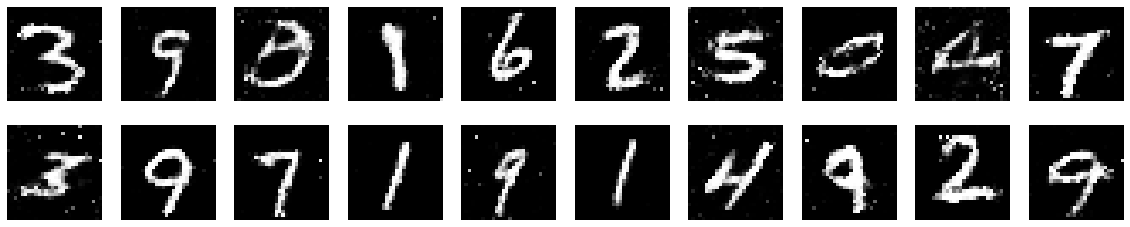

Epoch: 61000, Discrimination Loss: 0.651760, Discrimination Accuracy.: 60.16% Generator Loss: 0.921085


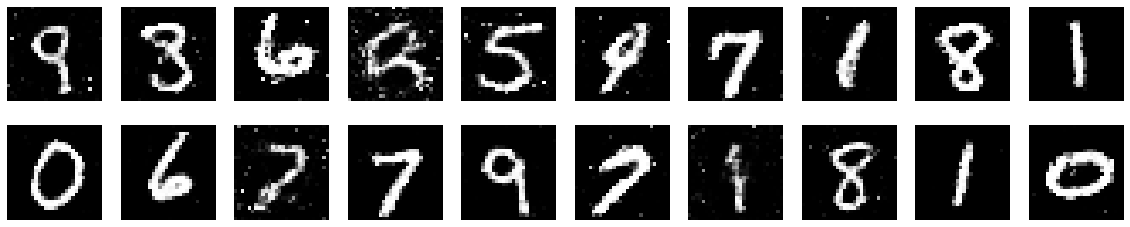

Epoch: 62000, Discrimination Loss: 0.698495, Discrimination Accuracy.: 46.88% Generator Loss: 0.919500


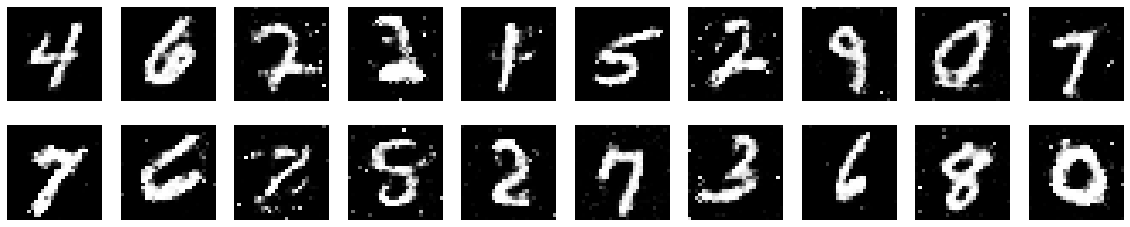

Epoch: 63000, Discrimination Loss: 0.657492, Discrimination Accuracy.: 60.94% Generator Loss: 0.868050


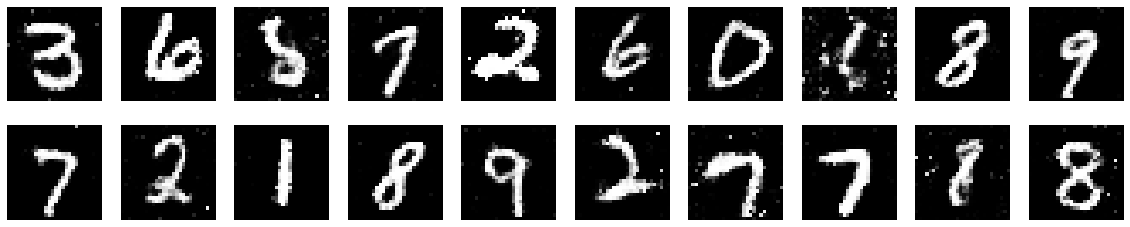

Epoch: 64000, Discrimination Loss: 0.641783, Discrimination Accuracy.: 64.06% Generator Loss: 0.926668


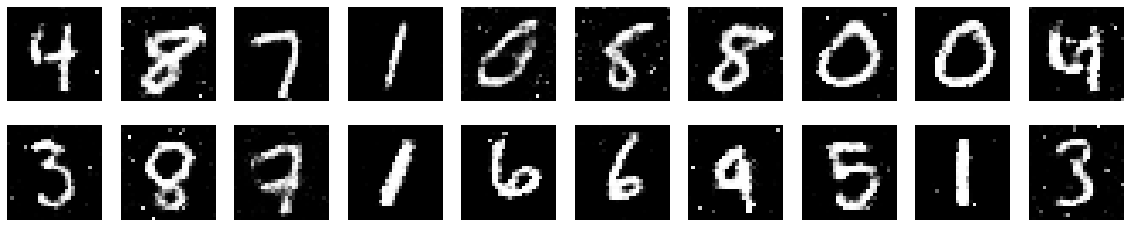

Epoch: 65000, Discrimination Loss: 0.697616, Discrimination Accuracy.: 52.34% Generator Loss: 0.840683


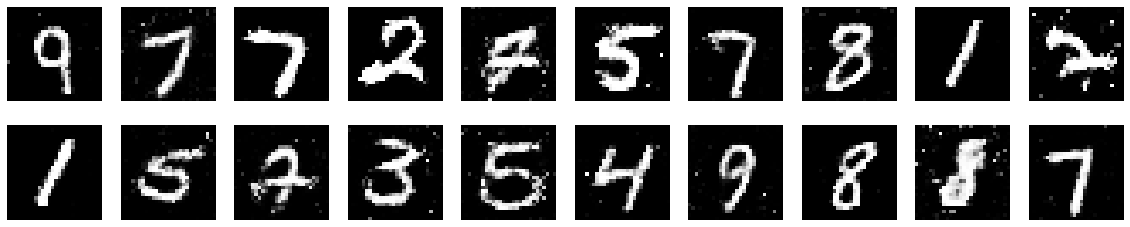

Epoch: 66000, Discrimination Loss: 0.651203, Discrimination Accuracy.: 57.81% Generator Loss: 0.985192


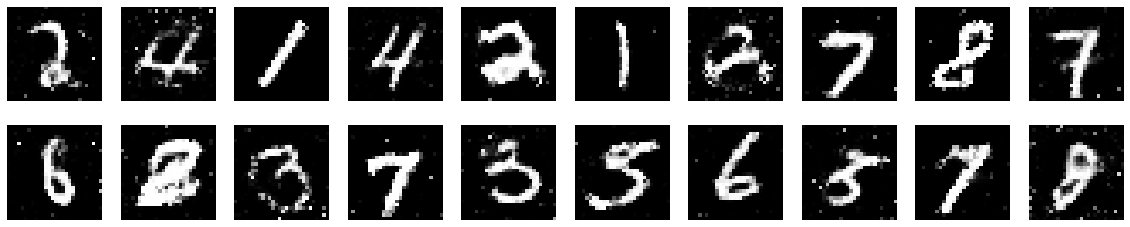

Epoch: 67000, Discrimination Loss: 0.632999, Discrimination Accuracy.: 64.06% Generator Loss: 0.905359


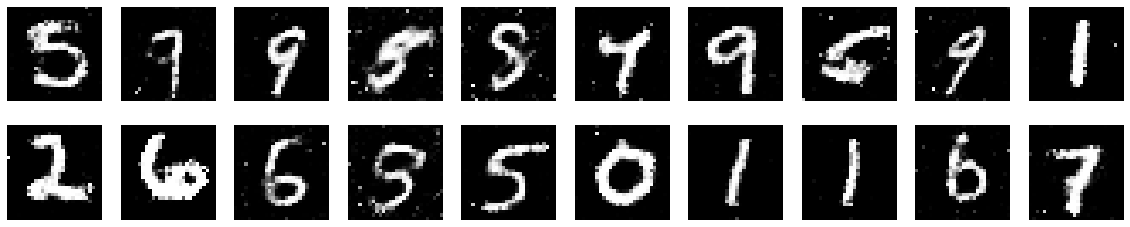

Epoch: 68000, Discrimination Loss: 0.656976, Discrimination Accuracy.: 57.81% Generator Loss: 0.920213


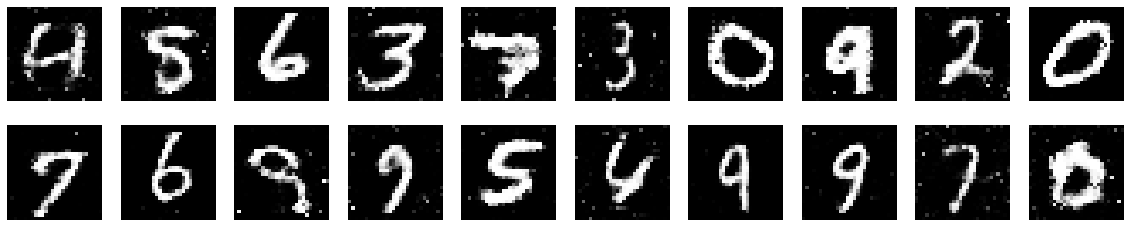

Epoch: 69000, Discrimination Loss: 0.612629, Discrimination Accuracy.: 71.88% Generator Loss: 0.865985


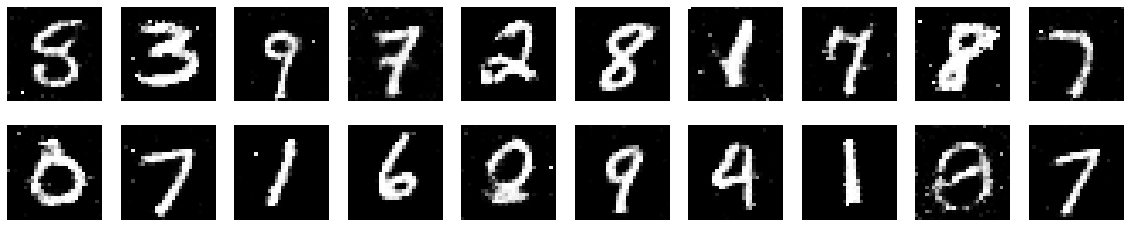

Epoch: 70000, Discrimination Loss: 0.632266, Discrimination Accuracy.: 60.94% Generator Loss: 0.917702


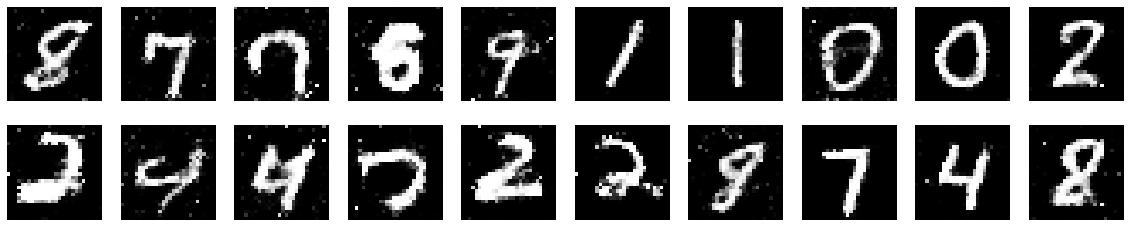

Epoch: 71000, Discrimination Loss: 0.637656, Discrimination Accuracy.: 62.50% Generator Loss: 0.948826


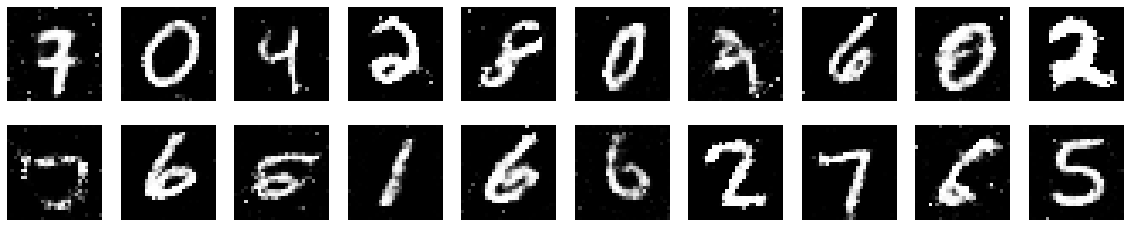

Epoch: 72000, Discrimination Loss: 0.650107, Discrimination Accuracy.: 57.81% Generator Loss: 0.890846


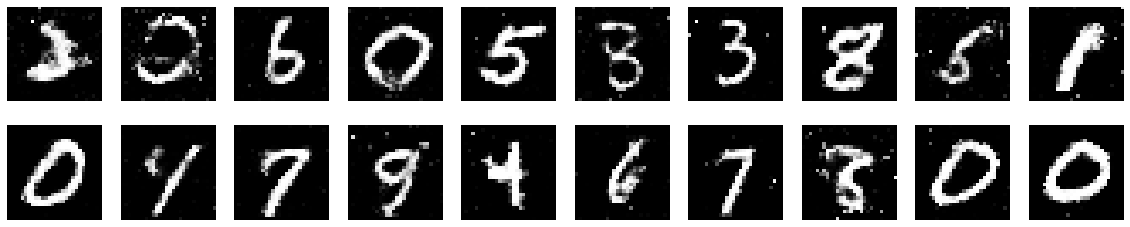

Epoch: 73000, Discrimination Loss: 0.688203, Discrimination Accuracy.: 56.25% Generator Loss: 0.949331


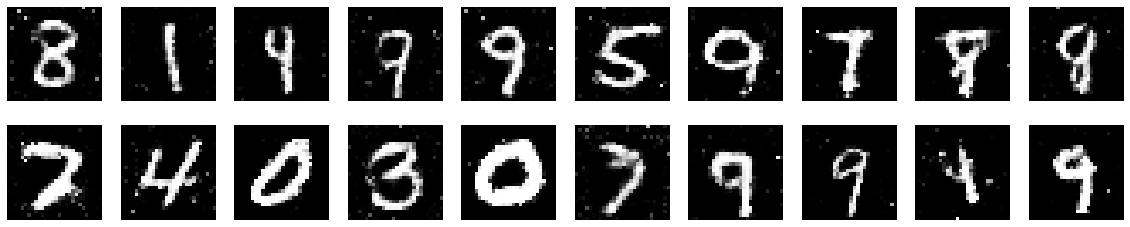

Epoch: 74000, Discrimination Loss: 0.585867, Discrimination Accuracy.: 72.66% Generator Loss: 0.920375


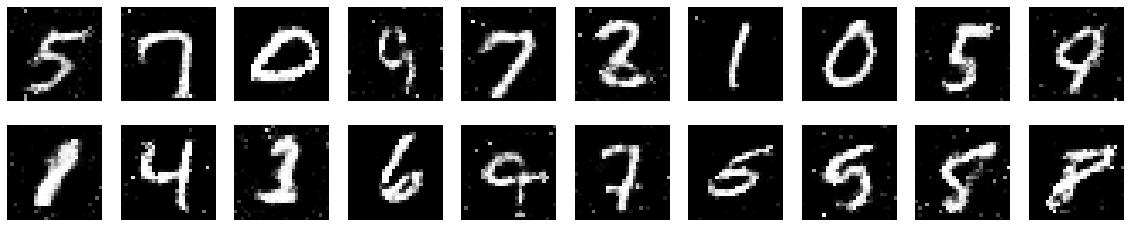

Epoch: 75000, Discrimination Loss: 0.641053, Discrimination Accuracy.: 60.94% Generator Loss: 0.873954


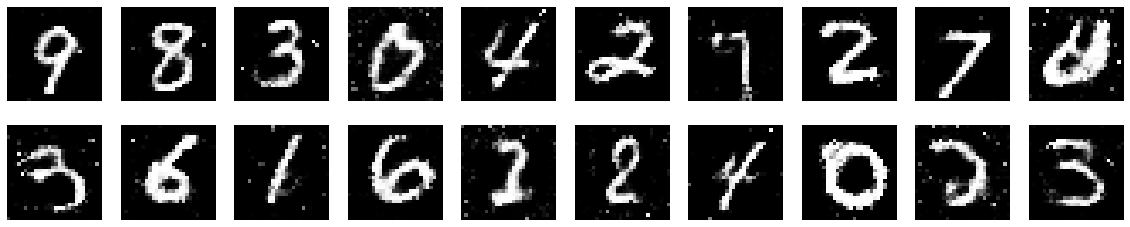

Epoch: 76000, Discrimination Loss: 0.667399, Discrimination Accuracy.: 54.69% Generator Loss: 0.874457


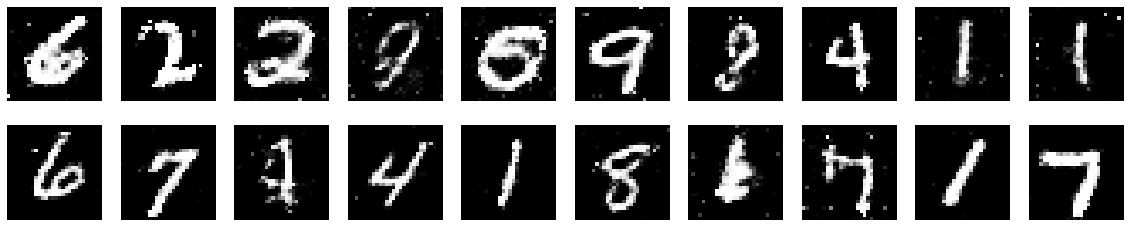

Epoch: 77000, Discrimination Loss: 0.677395, Discrimination Accuracy.: 56.25% Generator Loss: 0.905112


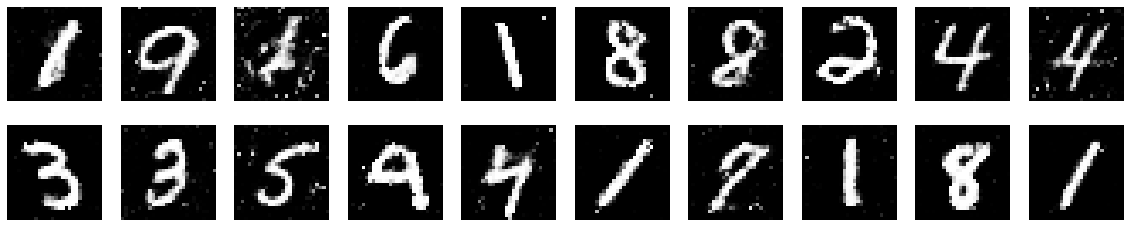

Epoch: 78000, Discrimination Loss: 0.671523, Discrimination Accuracy.: 56.25% Generator Loss: 0.887767


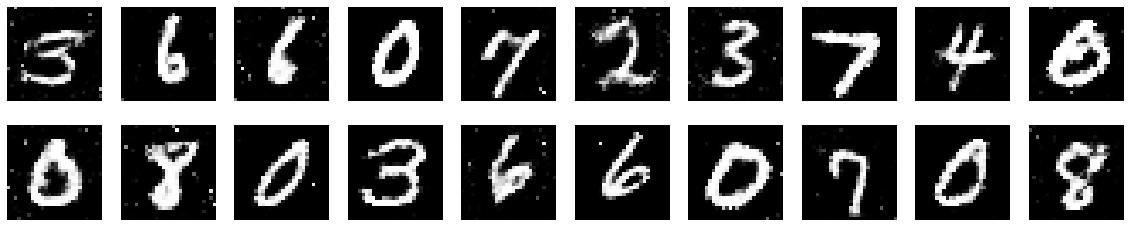

Epoch: 79000, Discrimination Loss: 0.668720, Discrimination Accuracy.: 57.03% Generator Loss: 0.943573


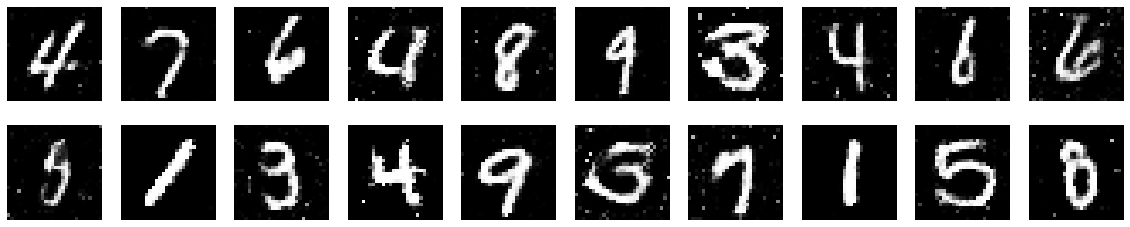

Epoch: 80000, Discrimination Loss: 0.654378, Discrimination Accuracy.: 60.16% Generator Loss: 0.936396


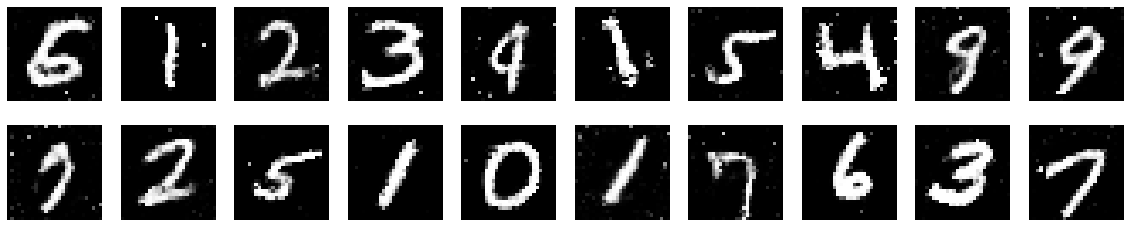

Epoch: 81000, Discrimination Loss: 0.656890, Discrimination Accuracy.: 57.81% Generator Loss: 0.925358


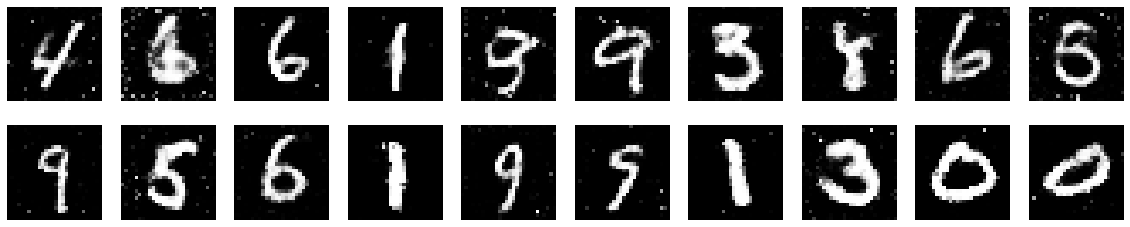

Epoch: 82000, Discrimination Loss: 0.618342, Discrimination Accuracy.: 63.28% Generator Loss: 0.923091


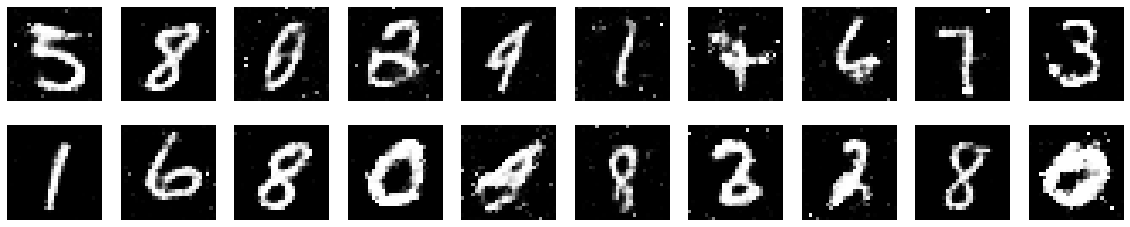

Epoch: 83000, Discrimination Loss: 0.607990, Discrimination Accuracy.: 70.31% Generator Loss: 1.008175


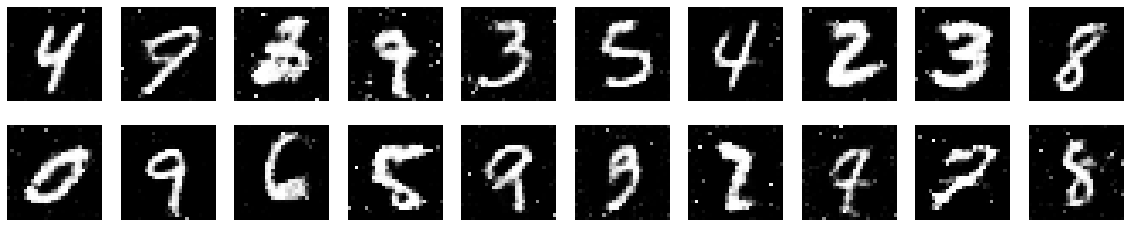

Epoch: 84000, Discrimination Loss: 0.625788, Discrimination Accuracy.: 64.84% Generator Loss: 0.970314


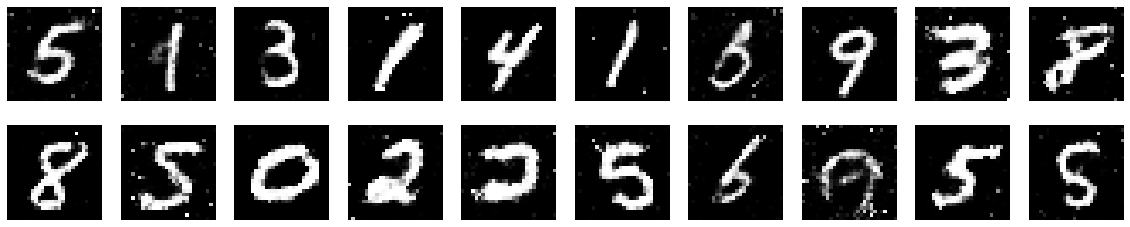

Epoch: 85000, Discrimination Loss: 0.656645, Discrimination Accuracy.: 60.94% Generator Loss: 0.955785


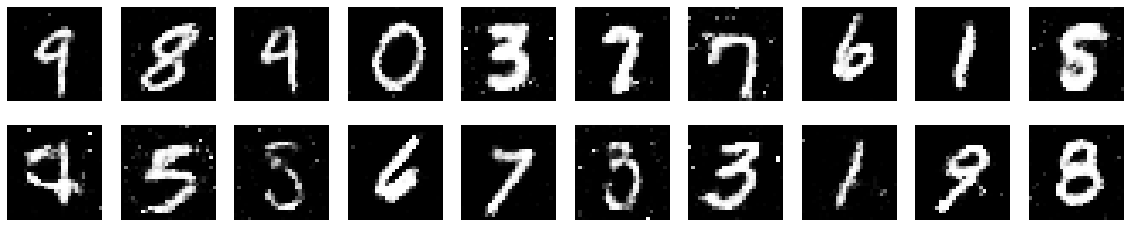

Epoch: 86000, Discrimination Loss: 0.636346, Discrimination Accuracy.: 63.28% Generator Loss: 0.977950


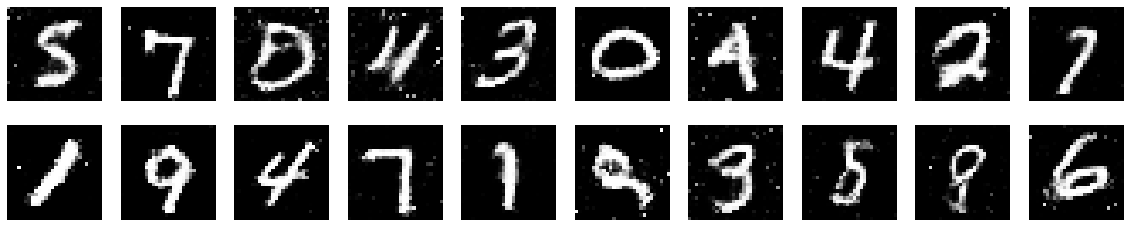

Epoch: 87000, Discrimination Loss: 0.655824, Discrimination Accuracy.: 60.16% Generator Loss: 0.908119


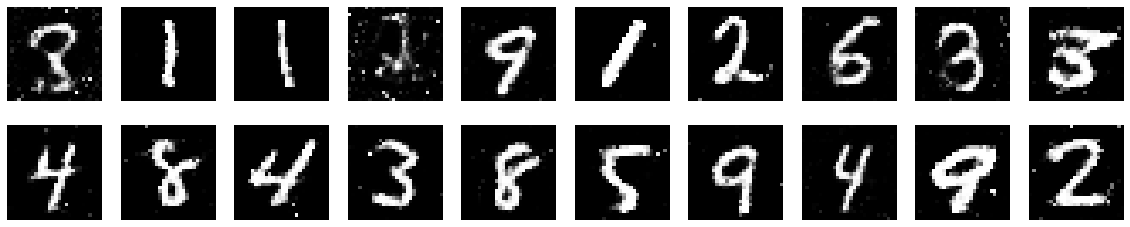

Epoch: 88000, Discrimination Loss: 0.679283, Discrimination Accuracy.: 51.56% Generator Loss: 0.905914


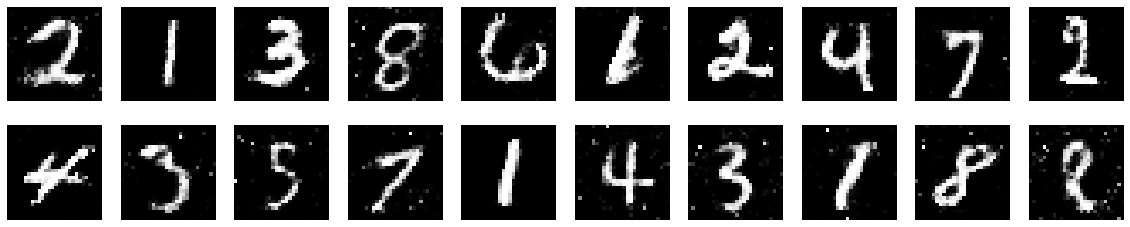

Epoch: 89000, Discrimination Loss: 0.628875, Discrimination Accuracy.: 64.84% Generator Loss: 0.881302


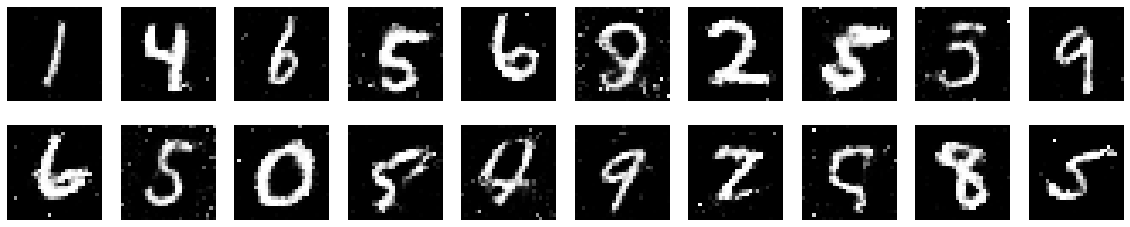

Epoch: 90000, Discrimination Loss: 0.636800, Discrimination Accuracy.: 61.72% Generator Loss: 0.995613


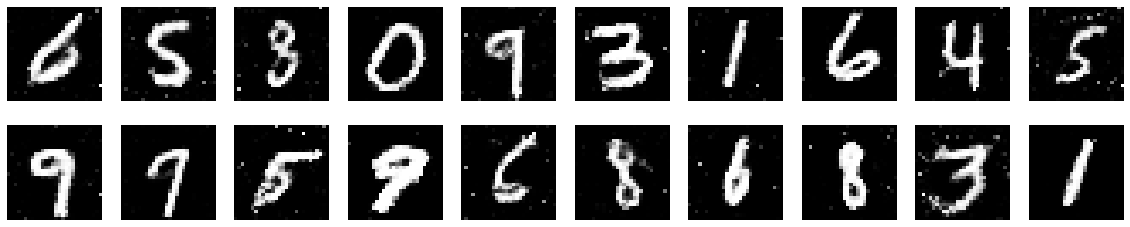

Epoch: 91000, Discrimination Loss: 0.644235, Discrimination Accuracy.: 67.19% Generator Loss: 0.925507


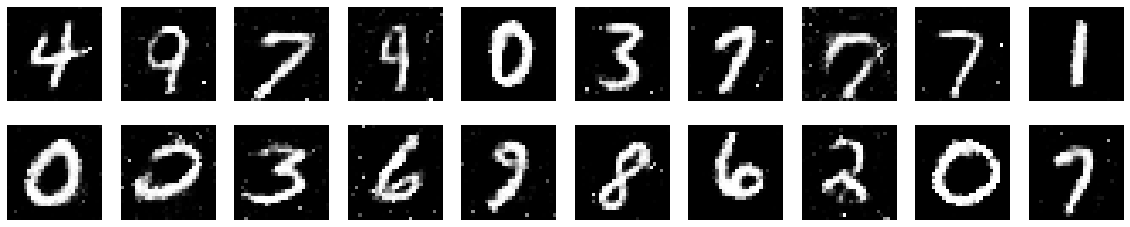

Epoch: 92000, Discrimination Loss: 0.598961, Discrimination Accuracy.: 66.41% Generator Loss: 0.908815


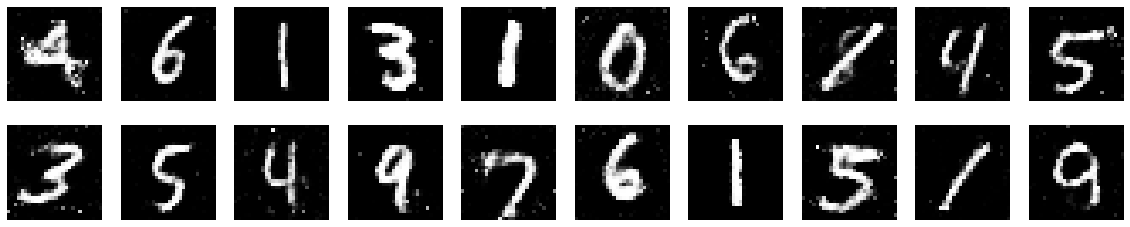

Epoch: 93000, Discrimination Loss: 0.698670, Discrimination Accuracy.: 55.47% Generator Loss: 1.043702


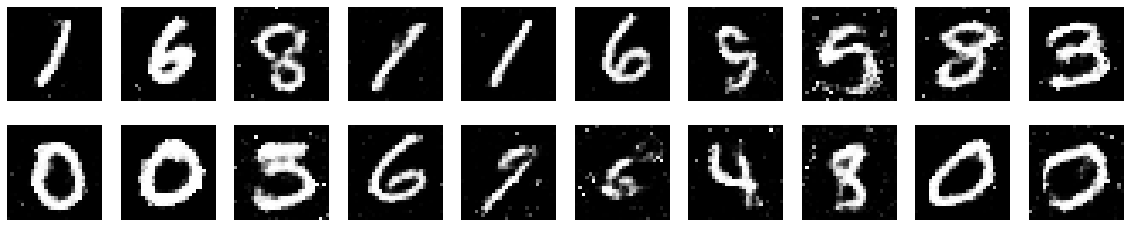

Epoch: 94000, Discrimination Loss: 0.694222, Discrimination Accuracy.: 56.25% Generator Loss: 0.922139


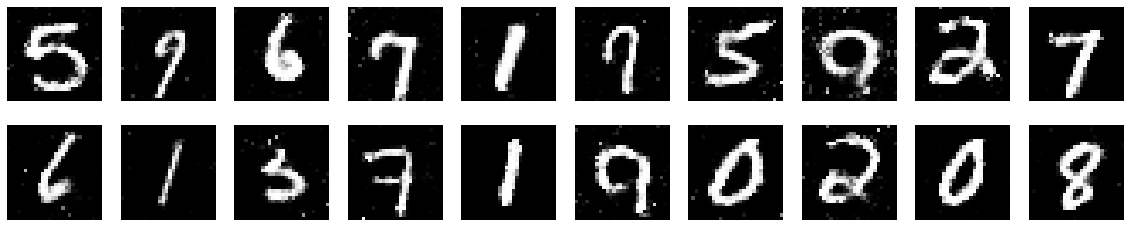

Epoch: 95000, Discrimination Loss: 0.594039, Discrimination Accuracy.: 68.75% Generator Loss: 0.993382


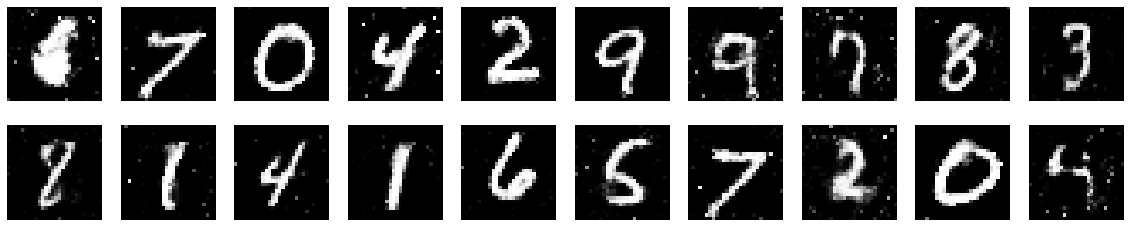

Epoch: 96000, Discrimination Loss: 0.662727, Discrimination Accuracy.: 57.81% Generator Loss: 0.971984


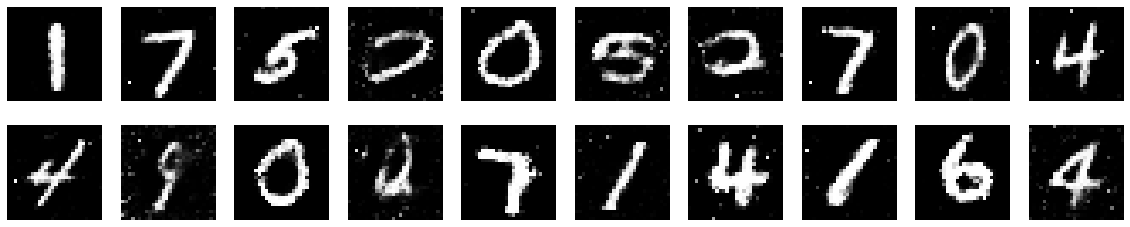

Epoch: 97000, Discrimination Loss: 0.680343, Discrimination Accuracy.: 57.03% Generator Loss: 0.945241


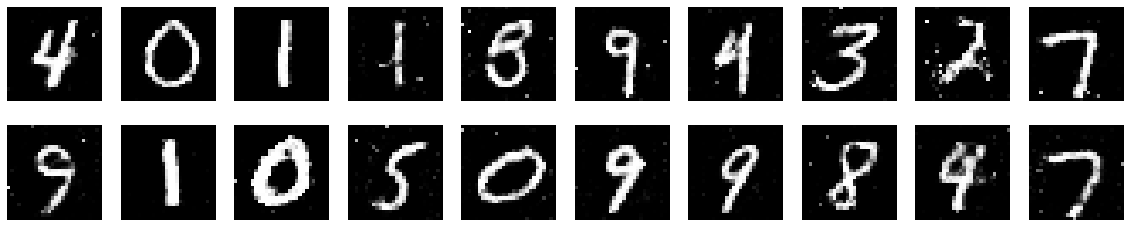

Epoch: 98000, Discrimination Loss: 0.653493, Discrimination Accuracy.: 60.16% Generator Loss: 0.978292


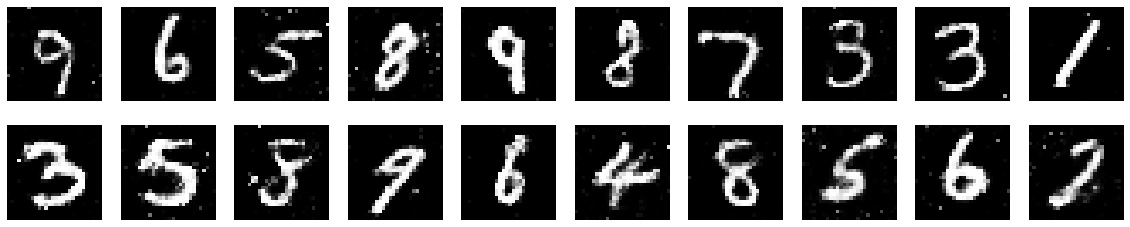

Epoch: 99000, Discrimination Loss: 0.646054, Discrimination Accuracy.: 61.72% Generator Loss: 1.023852


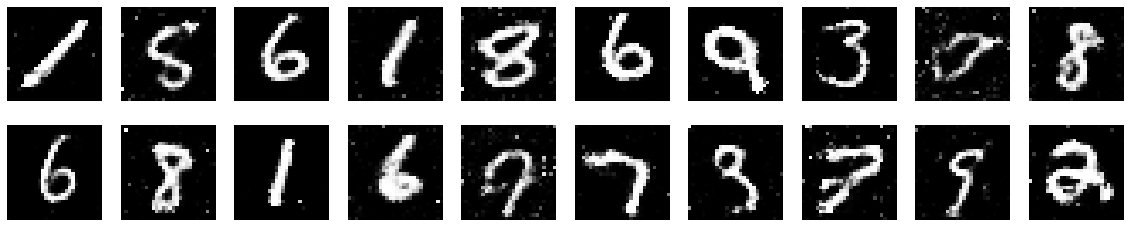

In [ ]:
epochs = 100000
batch_size = 128
print_interval = 1000
losses=[]

half_batch = int(batch_size / 2)

for epoch in range(epochs):

    
    idx = np.random.randint(0, X_train.shape[0], half_batch)
    imgs = X_train[idx]

    noise = np.random.normal(0, 1, (half_batch, 100))

    gen_imgs = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
    d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)


    
    noise = np.random.normal(0, 1, (batch_size, 100))
    
    valid_y = np.array([1] * batch_size)

    g_loss = combined.train_on_batch(noise, valid_y)
    losses.append((d_loss[0], g_loss, d_loss[1]))


    if epoch % print_interval == 0:
        print ("Epoch: %d, Discrimination Loss: %f, Discrimination Accuracy.: %.2f%% Generator Loss: %f" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
        print_imgs()
        
#Epoch indicates the number of passes of the entire training dataset 
# Datasets are usually grouped into batches
#generator training with half batch

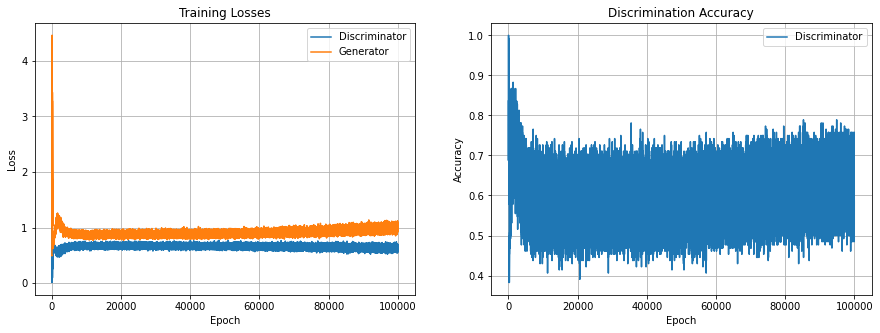

In [ ]:
losses = np.array(losses)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(losses.T[0], label='Discriminator')
plt.plot(losses.T[1], label='Generator')
plt.title("Training Losses")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(losses.T[2], label='Discriminator')
plt.title("Discrimination Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='upper right')